# 6.4 Supervised Machine Learning: Regression

# 1. Install the scikit-learn library.

Done.

# 2. Import the libraries you need into a new notebook, including any necessary modules from scikit-learn.

In [8]:
#Import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 3. Clean your data so that it’s ready for analysis.

I will use the most up-to-date data set that has already been cleaned and prepared.

In [14]:
#Import the latest version of the data
df_realtor = pd.read_pickle('/Users/ariedlin/Desktop/Career Foundry Assignments/6.1-6.7/Real Estate Project/2. Data/df_realtor_6.3')

In [16]:
#Check the head
df_realtor.head()

,price,bed,bath,acre_lot,state,house_size,price_range
3403,180000,2,1,0.34,Massachusetts,676.0,Low Range
3405,169900,2,2,0.21,Massachusetts,892.0,Low Range
3406,242000,2,2,0.21,Massachusetts,1428.0,Low Range
3407,299950,2,2,0.21,Massachusetts,1659.0,Low Range
3408,239900,3,1,0.46,Massachusetts,1196.0,Low Range


In [20]:
#Check the shape
df_realtor.shape

(1552547, 7)

In [22]:
#Double check for missing values
df_realtor.isnull().sum()

price          0
bed            0
bath           0
acre_lot       0
state          0
house_size     0
price_range    0
dtype: int64

# 4. Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

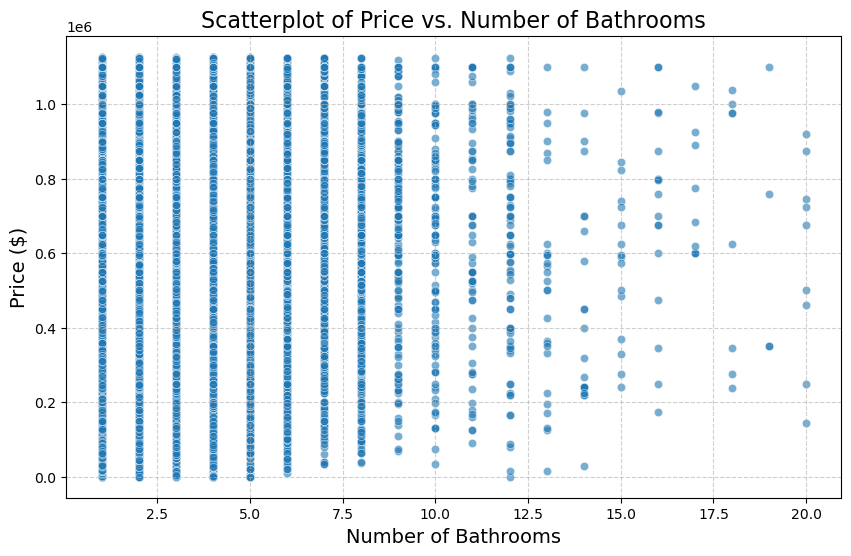

In [29]:
#Create a scatterplot comparing number of bathrooms and price
plt.figure(figsize=(10, 6))  # Set figure size
sns.scatterplot(data=df_realtor, x='bath', y='price', alpha=0.6)

#Add title and labels
plt.title('Scatterplot of Price vs. Number of Bathrooms', fontsize=16)
plt.xlabel('Number of Bathrooms', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)

#Customize grid
plt.grid(visible=True, linestyle='--', alpha=0.6)

#Show the plot
plt.show()

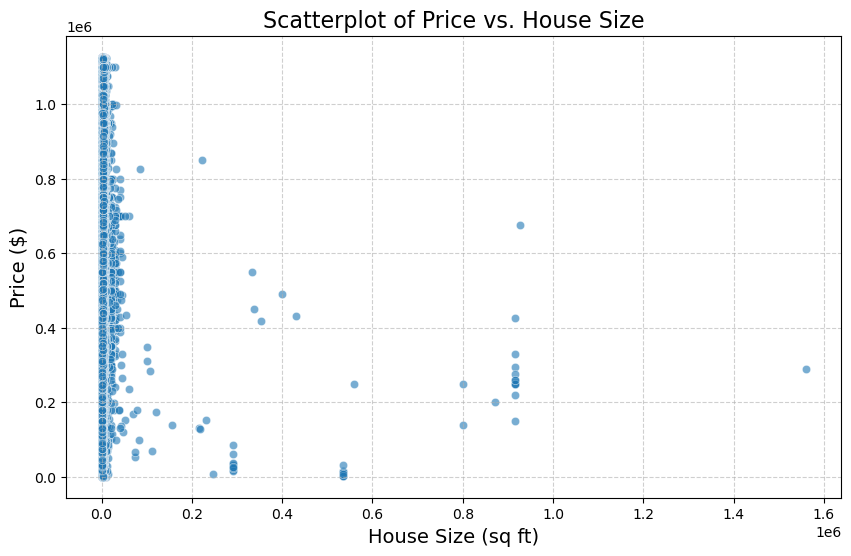

In [31]:
#Create a scatterplot comparing 'house_size' to 'price'
plt.figure(figsize=(10, 6))  # Set figure size
sns.scatterplot(data=df_realtor, x='house_size', y='price', alpha=0.6)

#Add title and labels
plt.title('Scatterplot of Price vs. House Size', fontsize=16)
plt.xlabel('House Size (sq ft)', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)

#Customize grid
plt.grid(visible=True, linestyle='--', alpha=0.6)

#Show the plot
plt.show()

There are too many outliers in this (1,600,000 sq ft is absolutely ridiculous!).  I think it is reasonable to assume that no residential real estate listing should ever be larger than 25,000 square feet, so I will remove all listings that are larger than that amount.

In [34]:
#Filter out rows with house_size greater than 25,000
df_realtor = df_realtor[df_realtor['house_size'] <= 25000]

In [36]:
df_realtor.shape

(1552388, 7)

159 rows were removed as outliers with more than 25,000 square feet for house_size.

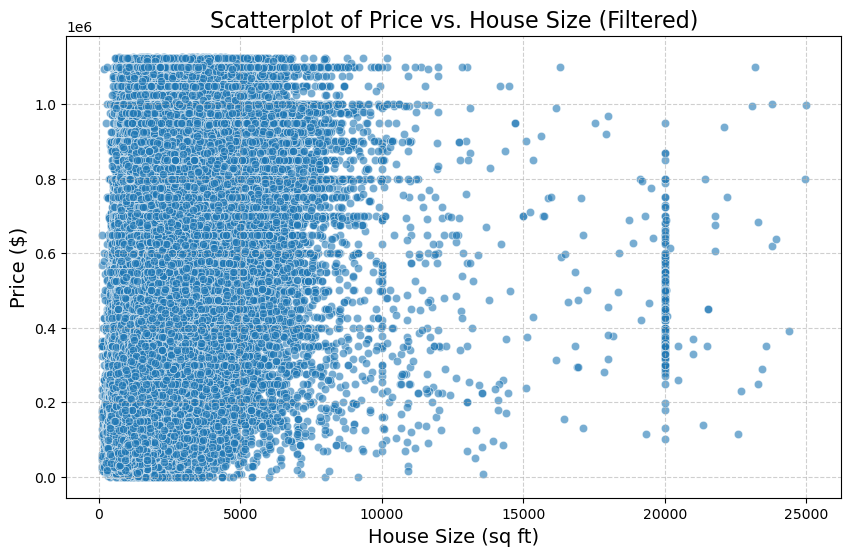

In [39]:
#Create the scatterplot without outliers for house_size
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_realtor, x='house_size', y='price', alpha=0.6)

#Add title and labels
plt.title('Scatterplot of Price vs. House Size (Filtered)', fontsize=16)
plt.xlabel('House Size (sq ft)', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)

#Customize grid
plt.grid(visible=True, linestyle='--', alpha=0.6)

#Show the plot
plt.show()

# 5. State your hypothesis 

If the size of a house (house_size) is larger, then the price of the house will be higher.

# 6. Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [43]:
#Reshape the variables into NumPy arrays and put them into separate objects
X = df_realtor['house_size'].values.reshape(-1,1)
y = df_realtor['price'].values.reshape(-1,1)

# 7. Split the data into two sets: a training set and a test set.

In [45]:
#Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 8. Run a linear regression on the data.
First, fit the model you created to the training set.
Then, create a prediction for y on the test set.

In [49]:
#Create a regression object.
regression = LinearRegression()

In [51]:
#Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [53]:
#Predict the values of y using X.
y_predicted = regression.predict(X_test)

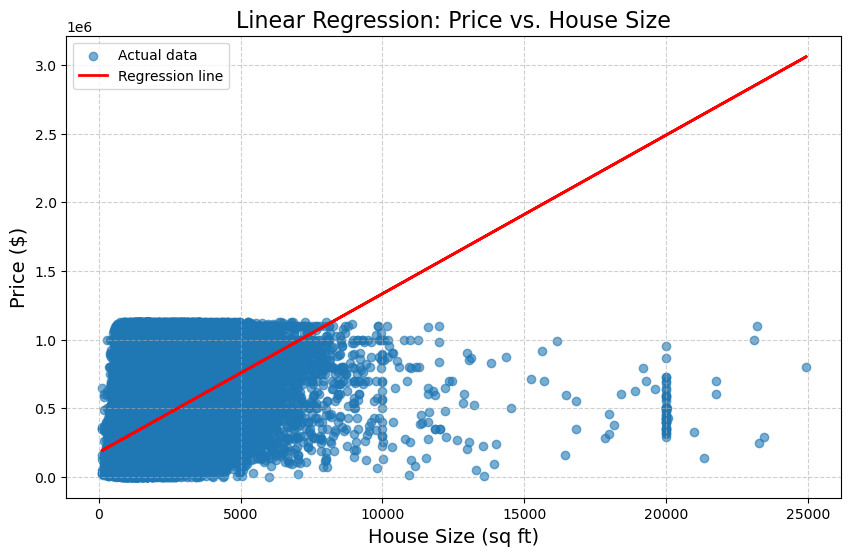

In [57]:
#Plot the regression line along with the data
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.6, label='Actual data')
plt.plot(X_test, y_predicted, color='red', linewidth=2, label='Regression line')
plt.title('Linear Regression: Price vs. House Size', fontsize=16)
plt.xlabel('House Size (sq ft)', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()

In [65]:
#Create objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted, squared=False)
r2 = r2_score(y_test, y_predicted)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [67]:
#Print the model summary statistics. This is where you evaluate the performance of the model
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[115.62320857]]
Mean squared error:  206973.16880284384
R2 score:  0.1918761721998431


In [69]:
#Create a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,165000,270213.068758
1,410000,355542.996684
2,300000,466772.523330
3,329000,308831.220421
4,325000,467466.262582
5,84900,334268.326307
6,435000,463997.566325
7,320000,295650.174644
8,349900,437866.721187
9,369999,356930.475187


# 9. Create a plot that shows the regression line on the test set.

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


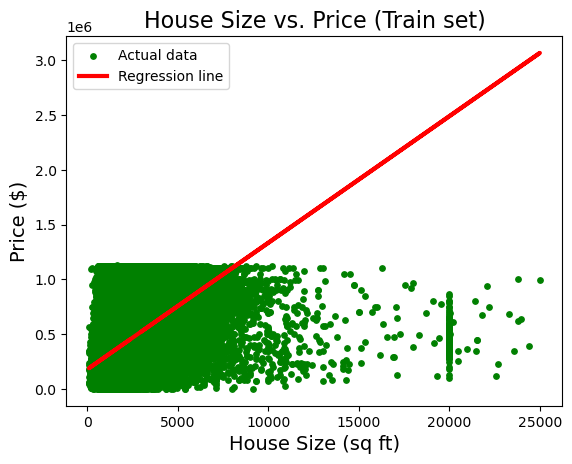

In [80]:
#Visualize the test set results
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s=15, label='Actual data')
plot_test.plot(X_train, y_predicted_train, color='red', linewidth=3, label='Regression line')
plot_test.title('House Size vs. Price (Train set)', fontsize=16)
plot_test.xlabel('House Size (sq ft)', fontsize=14)
plot_test.ylabel('Price ($)', fontsize=14)
plot_test.legend()  # Add a legend for clarity
plot_test.show()

# 10. Write your own interpretation of how well the line appears to fit the data in a markdown cell.

The line definitely does not fit the data in a linear pattern.  This is likely due to the nature of real estate.  Tiny 700 square foot homes or condos in New York City will sell for a million dollars while a 10,000 square foot ranch in rural Oklahoma will sell for $200,000.  However, you can see that the datapoints trend upwards as the house_size increases.

# 11. Check the model performance statistics—MSE and R2 score.

In [71]:
#Predict
y_predicted_train = regression.predict(X_train)

In [73]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [75]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[115.62320857]]
Mean squared error:  42984795492.2418
R2 score:  0.19151430365161837


# 12. Compare the predicted y values with the actual y values in a dataframe.

In [86]:
#Create a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,165000,270213.068758
1,410000,355542.996684
2,300000,466772.523330
3,329000,308831.220421
4,325000,467466.262582
5,84900,334268.326307
6,435000,463997.566325
7,320000,295650.174644
8,349900,437866.721187
9,369999,356930.475187


# 13. Include your thoughts on how well the model performed on the test set in a markdown cell.
Include any reflections you have on the impact of possible data bias.

From reviewing the actual vs. predicted values for price based on house_size, it appears that most of the predictions are pretty far off. There are a handful that are within 50,000, but even that ins't very close when we are talking about the difference between 375,000 and 339,587.

The more I have worked with this data, the more I feel like the data must have some errors in it which could cause some bias.  There are many real estate listings for 0 and many more for less than 100,000.  There were some listed with no bedrooms or bathrooms.  I have cleaned the data and removed some of the outliers, but some of this makes me questions whether there was some human errors when inputting the listings or just some very strange real estate listings being included in this data set.

In [90]:
#Save the most recent copy of the data frame
df_realtor.to_pickle('/Users/ariedlin/Desktop/Career Foundry Assignments/6.1-6.7/Real Estate Project/2. Data/df_realtor_6.4')